In [1]:
import pandas as pd
import numpy as np

In [2]:
colnames=['Id', 'price', 'volume', 'dollar_value', 'timestamp', 'isSellerTaker', 'a']

df = pd.read_csv("./data/Kyles Lambda Files-20250318/DOGEUSDT-trades-2025-03-15.csv", names=colnames, header=None)

In [3]:
df.head()

,Id,price,volume,dollar_value,timestamp,isSellerTaker,a
0,1051349891,0.17194,1142.0,196.35548,1741996800004560,True,True
1,1051349892,0.17194,58.0,9.97252,1741996800142250,True,True
2,1051349893,0.17194,7.0,1.20358,1741996800142250,True,True
3,1051349894,0.17194,7.0,1.20358,1741996800142250,True,True
4,1051349895,0.17194,54.0,9.28476,1741996800142250,True,True


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='us')
df.head()

,Id,price,volume,dollar_value,timestamp,isSellerTaker,a
0,1051349891,0.17194,1142.0,196.35548,2025-03-15 00:00:00.004560,True,True
1,1051349892,0.17194,58.0,9.97252,2025-03-15 00:00:00.142250,True,True
2,1051349893,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True
3,1051349894,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True
4,1051349895,0.17194,54.0,9.28476,2025-03-15 00:00:00.142250,True,True


In [5]:
df['agressor_side'] = -df['isSellerTaker']*2.0-1.0
df.head()

,Id,price,volume,dollar_value,timestamp,isSellerTaker,a,agressor_side
0,1051349891,0.17194,1142.0,196.35548,2025-03-15 00:00:00.004560,True,True,-1.0
1,1051349892,0.17194,58.0,9.97252,2025-03-15 00:00:00.142250,True,True,-1.0
2,1051349893,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True,-1.0
3,1051349894,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True,-1.0
4,1051349895,0.17194,54.0,9.28476,2025-03-15 00:00:00.142250,True,True,-1.0


In [6]:
df['order_flow']=df['volume']*df['agressor_side']
df.head()

,Id,price,volume,dollar_value,timestamp,isSellerTaker,a,agressor_side,order_flow
0,1051349891,0.17194,1142.0,196.35548,2025-03-15 00:00:00.004560,True,True,-1.0,-1142.0
1,1051349892,0.17194,58.0,9.97252,2025-03-15 00:00:00.142250,True,True,-1.0,-58.0
2,1051349893,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True,-1.0,-7.0
3,1051349894,0.17194,7.0,1.20358,2025-03-15 00:00:00.142250,True,True,-1.0,-7.0
4,1051349895,0.17194,54.0,9.28476,2025-03-15 00:00:00.142250,True,True,-1.0,-54.0


In [7]:
df = df.set_index('timestamp')
df = df.resample('1min').agg({'order_flow':'sum'})
df.head()

,order_flow
timestamp,
2025-03-15 00:00:00,173127.0
2025-03-15 00:01:00,-481315.0
2025-03-15 00:02:00,26080.0
2025-03-15 00:03:00,-89372.0
2025-03-15 00:04:00,-52649.0


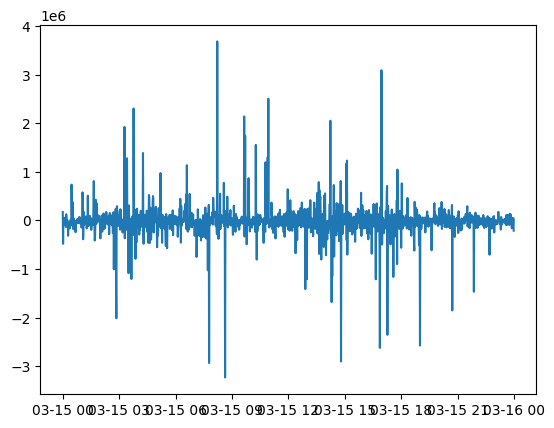

In [8]:
import matplotlib.pyplot as plt
plt.plot(df)